# Heart Disease Prediction  

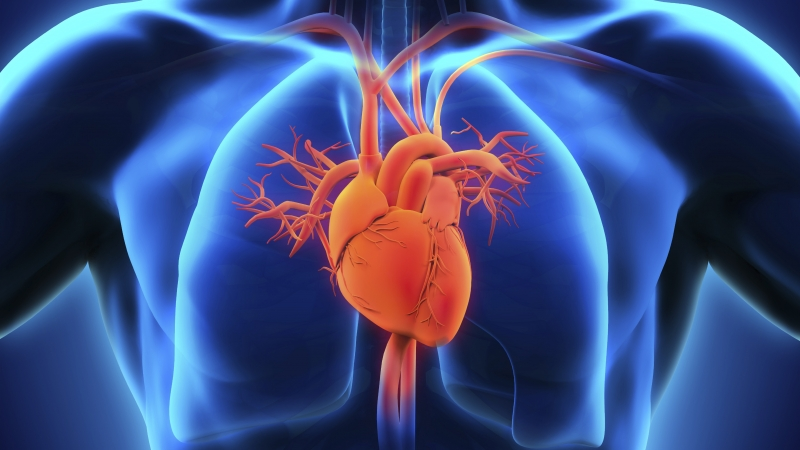

In [76]:
import IPython
IPython.display.Image('https://www.sgul.ac.uk/image-library/news-and-events-images/imported/b2ap3_thumbnail_Heart-2-Cropped.x639c9ccb.jpg')

## Project Objective:

Heart Disease Prediction using Machine Learning
Heart disease prevention is critical, and data-driven prediction systems can significantly aid in early diagnosis and treatment. Machine Learning offers accurate prediction capabilities, enhancing healthcare outcomes.
In this project, I analyzed a heart disease dataset with appropriate preprocessing. Multiple classification algorithms were implemented in Python using Scikit-learn and Keras to predict the presence of heart disease.

**Algorithms Used**:
- Logistic Regression
- Naive Bayes
- Support Vector Machine (Linear)
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- XGBoost
- Artificial Neural Network (1 Hidden Layer, Keras)


In [77]:
# Multiple model test: Best model saved (Best score)

## step 1 importing important modules:

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('done')

done


## Step 2 : Loading Data

In [79]:
url = '''https://github.com/ankitmisk/Heart_Disease_Prediction_ML_Model/blob/main/heart.csv?raw=true'''
df = pd.read_csv(url)
print('Done')


Done


## Step 3 Understanding data using EDA

In [80]:
# 3.1 Data head
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [81]:
# 3.3 data Shape
df.shape

(303, 14)

In [82]:
# 3.2 data tail
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [83]:
# 3.4 data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [84]:
# 3.5 data columns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

###### 3.6 Column Desc
- **age**:			``age``
- **sex**:			``1: male, 0: female``
- **cp**:			``chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic``
- **trestbps**:			``resting blood pressure``
- **chol**:			`` serum cholestoral in mg/dl``
- **fbs**:			``fasting blood sugar > 120 mg/dl``
- **restecg**:			``resting electrocardiographic results (values 0,1,2)``
- **thalach**:			 ``maximum heart rate achieved``
- **exang**:			``exercise induced angina``
- **oldpeak**:			``oldpeak = ST depression induced by exercise relative to rest``
- **slope**:			``the slope of the peak exercise ST segment``
- **ca**:			``number of major vessels (0-3) colored by flourosopy``
- **thal**:			``thal: 3 = normal; 6 = fixed defect; 7 = reversable defect``

##### 3.7:Checking null values

In [85]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### 3.8: Columns Stats

In [86]:
df.describe().round(2)

age     sex      cp  trestbps    chol     fbs  restecg  thalach  \
count  303.00  303.00  303.00    303.00  303.00  303.00   303.00   303.00   
mean    54.37    0.68    0.97    131.62  246.26    0.15     0.53   149.65   
std      9.08    0.47    1.03     17.54   51.83    0.36     0.53    22.91   
min     29.00    0.00    0.00     94.00  126.00    0.00     0.00    71.00   
25%     47.50    0.00    0.00    120.00  211.00    0.00     0.00   133.50   
50%     55.00    1.00    1.00    130.00  240.00    0.00     1.00   153.00   
75%     61.00    1.00    2.00    140.00  274.50    0.00     1.00   166.00   
max     77.00    1.00    3.00    200.00  564.00    1.00     2.00   202.00   

        exang  oldpeak   slope      ca    thal  target  
count  303.00   303.00  303.00  303.00  303.00  303.00  
mean     0.33     1.04    1.40    0.73    2.31    0.54  
std      0.47     1.16    0.62    1.02    0.61    0.50  
min      0.00     0.00    0.00    0.00    0.00    0.00  
25%      0.00     0.00    1.00    0.00    2.00    0.00  
50%      0.00     0.80    1.00    0.00    2.00    1.00  
75%      1.00     1.60    2.00    1.00    3.00    1.00  
max      1.00     6.20    2.00    4.00    3.00    1.00

#### 3.9: Each Columns Univariate Analysis

In [87]:
for i in df:
    print(f'Column_{i}',df[i].unique())
    print('+_+_+_+_+_+_+_+_+_+_+_+_+',end='\n\n')

Column_age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
+_+_+_+_+_+_+_+_+_+_+_+_+

Column_sex [1 0]
+_+_+_+_+_+_+_+_+_+_+_+_+

Column_cp [3 2 1 0]
+_+_+_+_+_+_+_+_+_+_+_+_+

Column_trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
+_+_+_+_+_+_+_+_+_+_+_+_+

Column_chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282

#### 3.10 Each Numarical Features Hist Plot Distribution

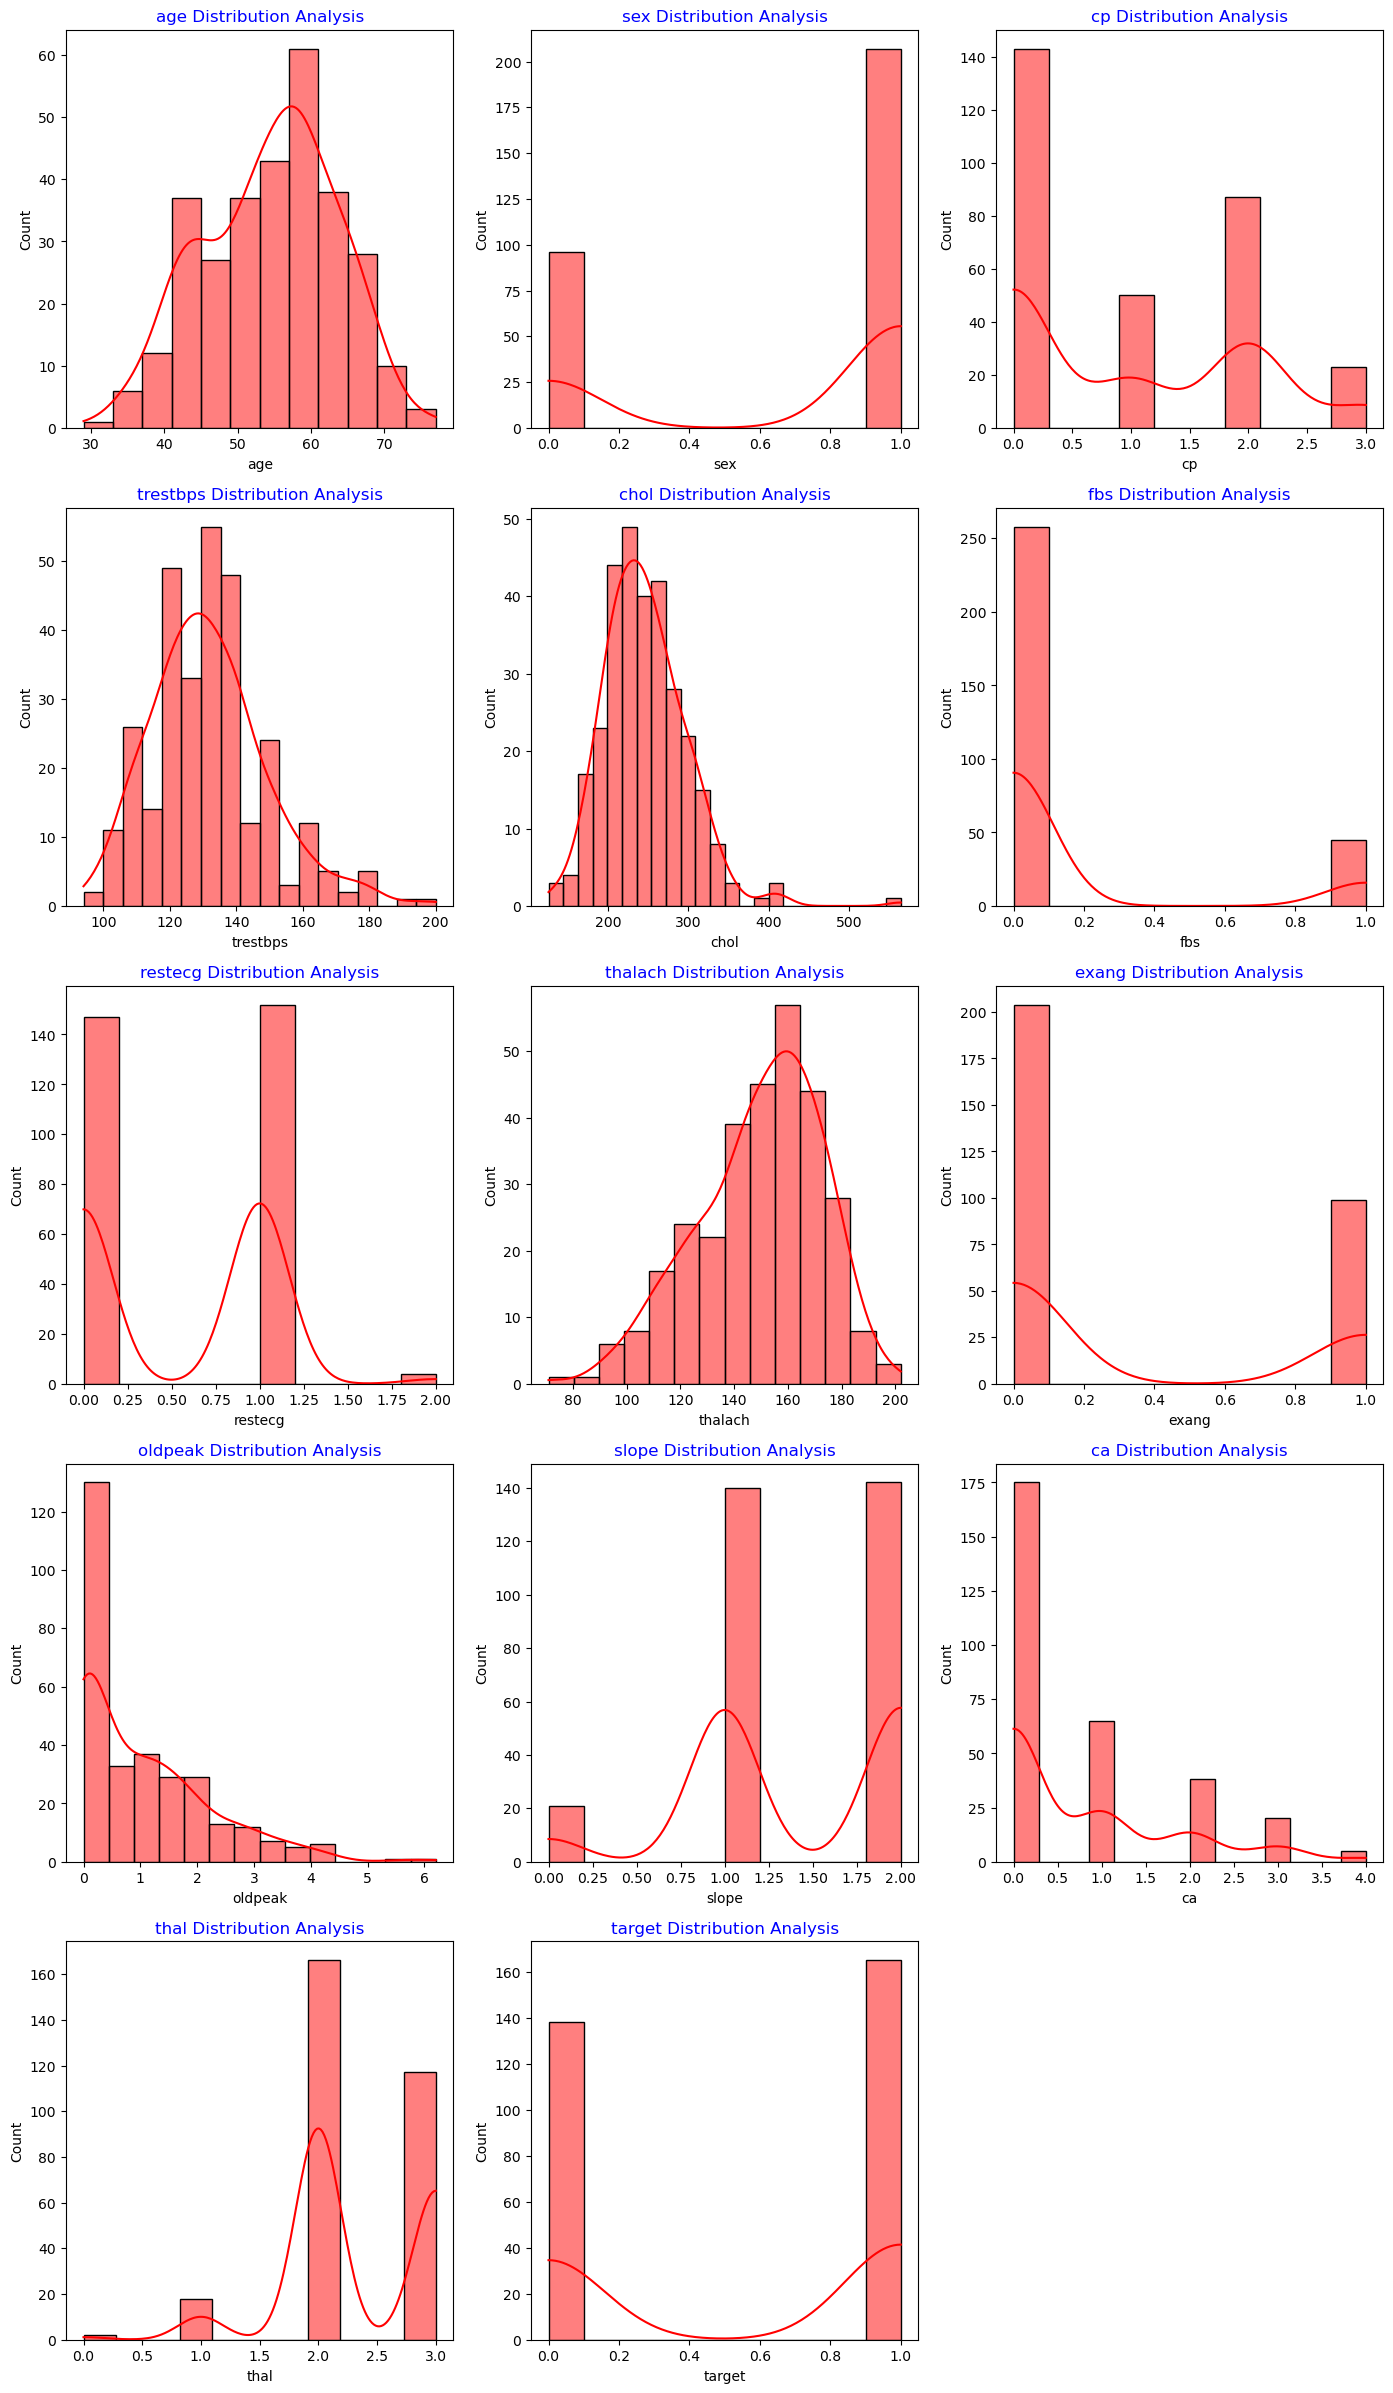

In [88]:
r = 5
c = 3
plt.figure(figsize=(17,30))
for i,j in enumerate(df):
    plt.subplot(r,c,i+1)
    plt.title(f'{j} Distribution Analysis',color = 'Blue')
    sns.histplot(df[j],kde = True,color = 'r')
plt.savefig('All Numarical Features Analysis',dpi=500)

plt.show()


In [89]:
#target col not that much  imbalance, we can proceed,if imbalace found we need to balce using sampling

#### 3.11:  Bivariate Analysis, To Chech Correlation of Feature vs Target

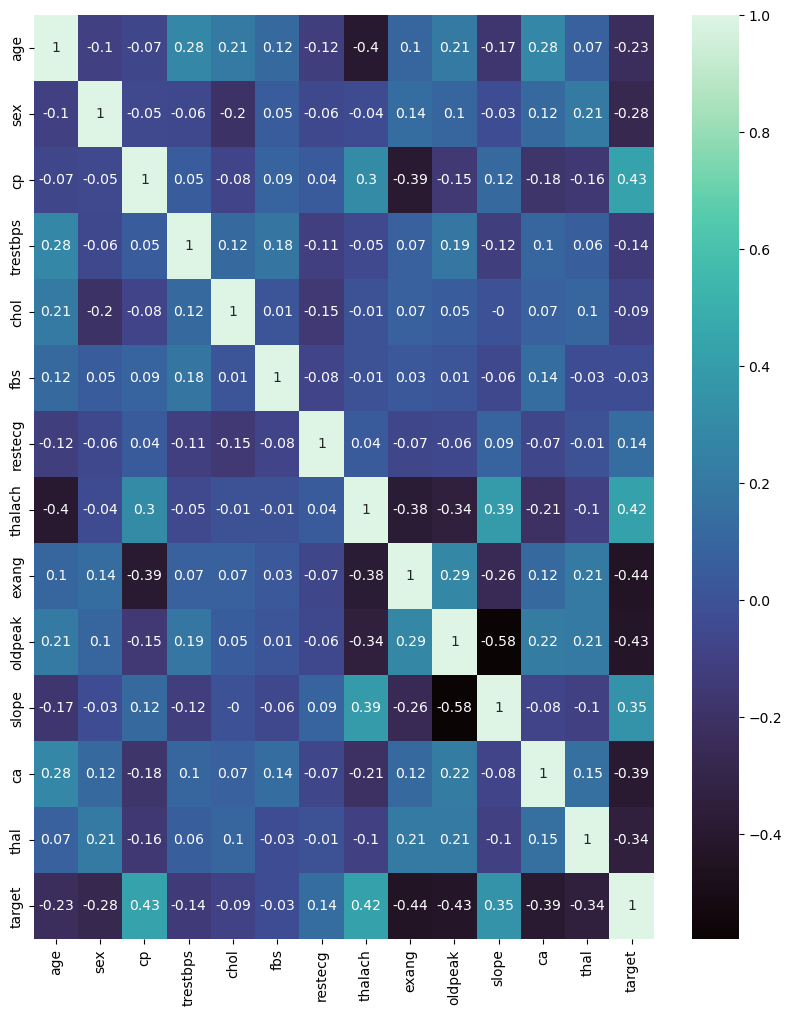

In [90]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr().round(2),cmap='mako',annot=True)
plt.show()

In [91]:
# "thalach" refers to the maximum heart rate achieved during exercise, specifically measured in beats per minute (bpm)

In [92]:
# Fasting blood sugar (FBS) levels, when elevated, can indicate an increased risk of heart disease

In [93]:
# "slope" usually refers to the ST/HR slope, which is a measurement derived from an exercise stress test used to assess the severity of coronary artery disease

In [94]:
# 3.12: Target vs Features
df.corr()['target'].sort_values(ascending = False).reset_index()


index    target
0     target  1.000000
1         cp  0.433798
2    thalach  0.421741
3      slope  0.345877
4    restecg  0.137230
5        fbs -0.028046
6       chol -0.085239
7   trestbps -0.144931
8        age -0.225439
9        sex -0.280937
10      thal -0.344029
11        ca -0.391724
12   oldpeak -0.430696
13     exang -0.436757

In [95]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

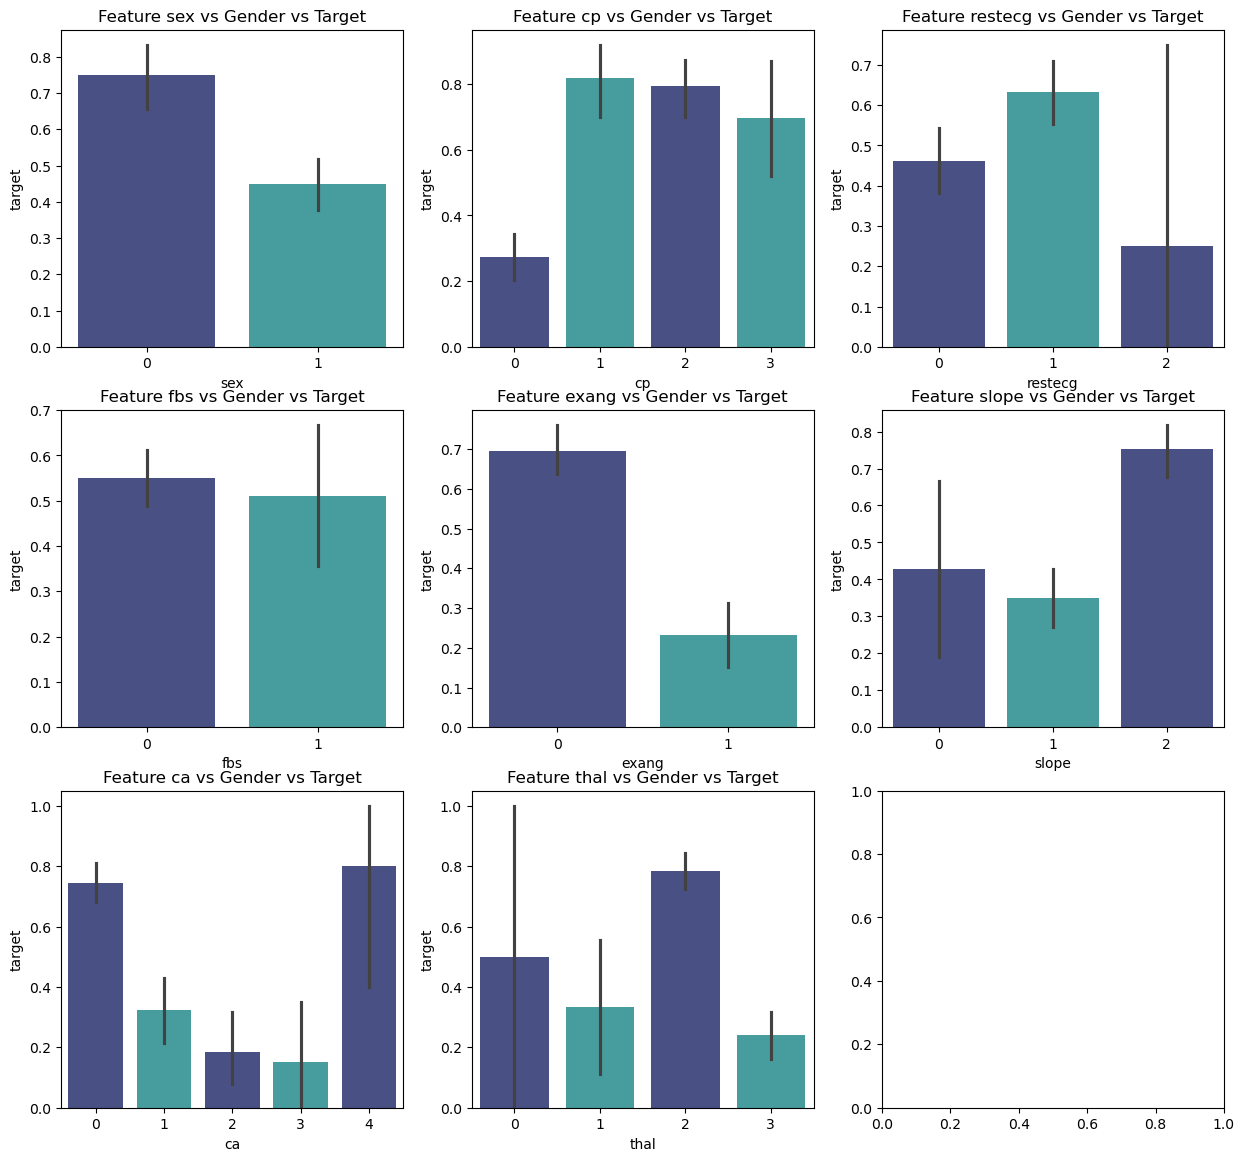

In [96]:
r = 3
c = 3
x_col = ['sex','cp','restecg','fbs','exang','slope', 'ca', 'thal']
plt.figure(figsize=(15,14))
for i in range(r*c):
    try:
        plt.subplot(r,c,i+1)
        plt.title(f'Feature {x_col[i]} vs Gender vs Target')
        sns.barplot(data = df, x = x_col[i], y = 'target', palette=sns.color_palette('mako',2))
    except:
        ...


plt.show()


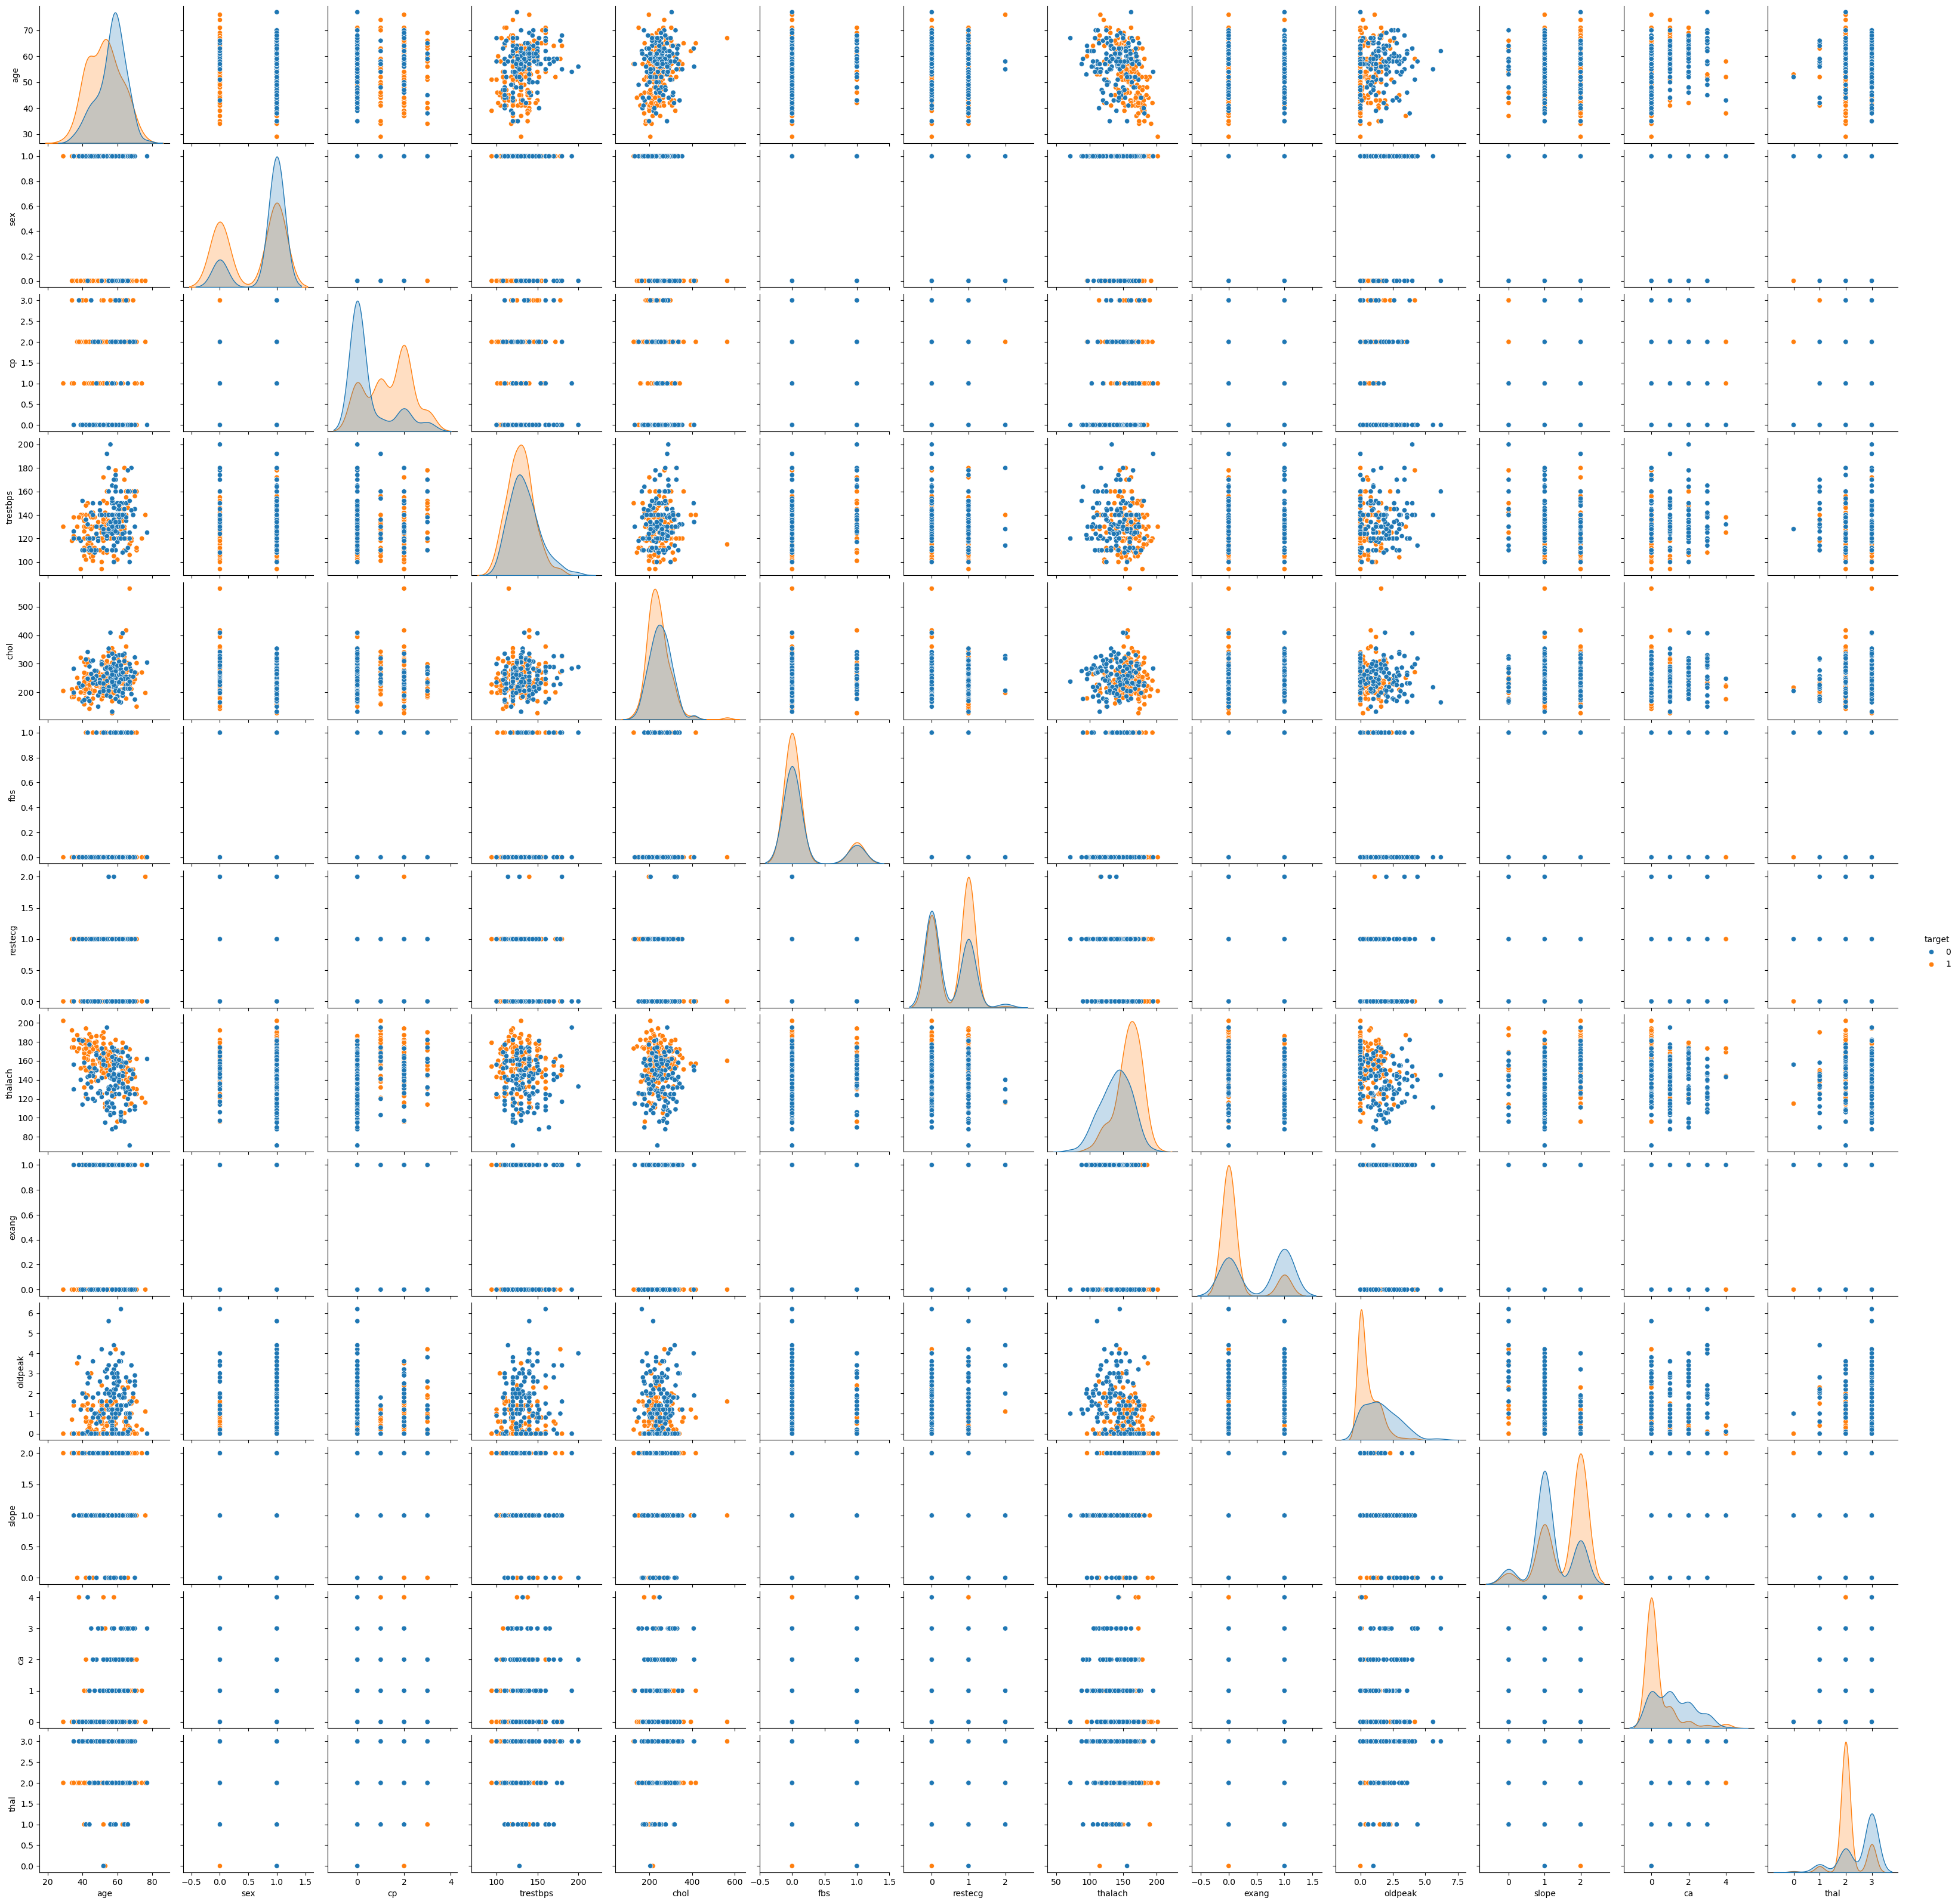

In [97]:
sns.pairplot(data=df,hue='target')
plt.show()

In [98]:
# 4.1 Divide data into Target and Features

X = df.iloc[:,:-1]
y = df['target']


In [99]:
X.shape, y.shape

((303, 13), (303,))

In [100]:
# 4.2 Train - test Split

In [101]:
# 4.2 Train - test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [103]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_train,y_train)

LogisticRegression()

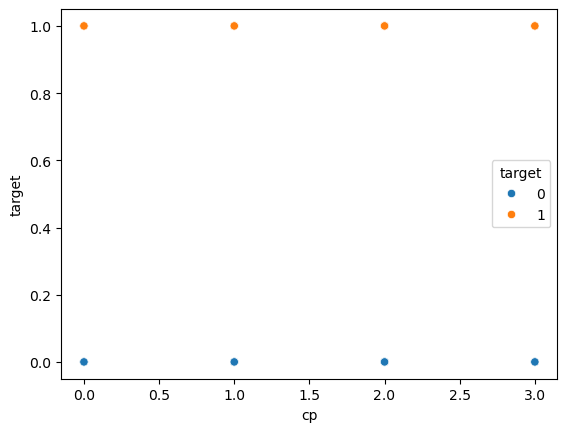

In [104]:
sns.scatterplot(data = df, x = 'cp', y = 'target', hue = 'target')
plt.show()

In [105]:
y_pred = model_lr.predict(X_test)
# y_pred

In [106]:
# 5.1.2: Import model evaluation metrices
# It will be called only when problem is of Classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

In [107]:
# 5.1.3: Import Confusion Matrix to Evaluate classificationModel
from sklearn.metrics import confusion_matrix

In [108]:
# Error: comparison: if Score tie
# Type1, Type2: Type 1 Error danger ,

In [109]:
cm = confusion_matrix(y_test,y_pred)

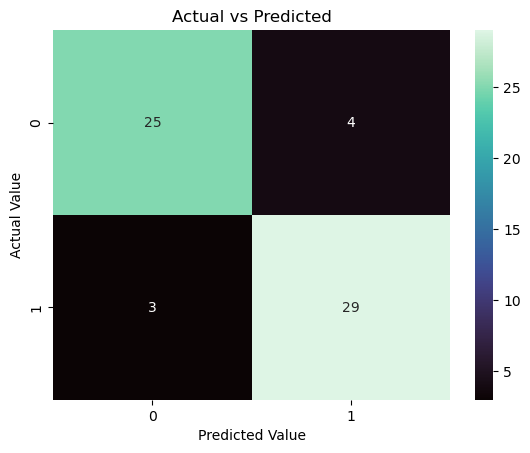

In [110]:
plt.title('Actual vs Predicted')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [111]:
TN,FP,FN,TP = cm.ravel()

In [112]:
precision_score(y_test,y_pred)

0.8787878787878788

In [113]:
acs = (TN + TP)/cm.sum()
print(acs)

0.8852459016393442


In [114]:
rs = recall_score(y_test,y_pred)
print('Recall Score is: ',rs)

Recall Score is:  0.90625


In [115]:
f1_sc = f1_score(y_test,y_pred)
f1_sc

0.8923076923076924

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [117]:
#5.1.4: Checking Model Score
# Model Score same as accuracy Score
model_lr.score(X_test,y_test)

0.8852459016393442

In [118]:
#5.1.4: Checking Model Score
# Model Score same as accuracy Score
lr_score=model_lr.score(X_test,y_test)

In [119]:
from sklearn.naive_bayes import GaussianNB
# GaussianNB only be use in case of binary classification
# MultinomialNB: only be use in case of Multi class classification


model_nv = GaussianNB()

model_nv.fit(X_train,y_train)  # Train part/learning


GaussianNB()

In [120]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))


Accuracy Score:  0.8852459016393442
Precision Score:  0.8787878787878788
Recall Score:  0.90625
F1 Score:  0.8923076923076924


Text(50.722222222222214, 0.5, '')

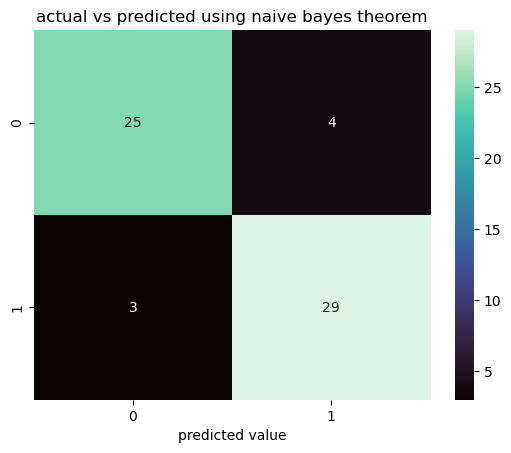

In [121]:
cm=confusion_matrix(y_test,y_pred)
plt.title("actual vs predicted using naive bayes theorem")
sns.heatmap(cm,annot=True,cmap='mako')
plt.xlabel("predicted value")
plt.ylabel("")

In [122]:
# Model1>Y_pred>Scores>confusionMatrix>classification_report
# Model2>Y_pred>Scores>confusionMatrix>classification_report
# Model3>Y_pred>Scores>confusionMatrix>classification_report
# Model4>Y_pred>Scores>confusionMatrix>classification_report
# Model5>Y_pred>Scores>confusionMatrix>classification_report
# Model6>Y_pred>Scores>confusionMatrix>classification_report
# best Model Save: Error(low), Accuracy Score

In [123]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(X_train,y_train)

SVC()

In [124]:
y_pred=model_svc.predict(X_test)

In [125]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))


Accuracy Score:  0.7049180327868853
Precision Score:  0.6666666666666666
Recall Score:  0.875
F1 Score:  0.7567567567567568


In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



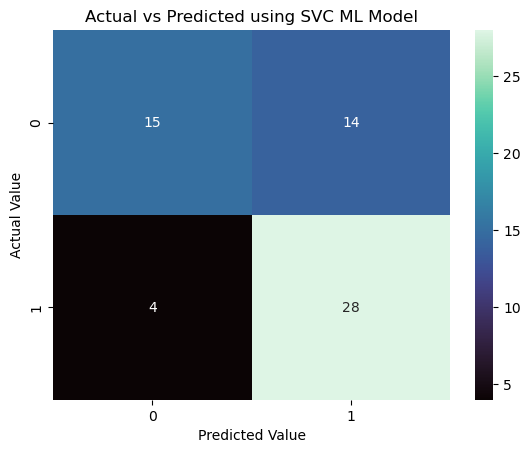

In [127]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using SVC ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [128]:
svm_score = accuracy_score(y_test,y_pred)

In [129]:
model_svc.score(X_test,y_test)

0.7049180327868853

In [130]:
lr_score,svm_score

(0.8852459016393442, 0.7049180327868853)

In [131]:
model_nv.score(X_test,y_test)

0.8688524590163934

In [132]:
# iflower=sepal_length,sepal_width,petal_legth,petal_width
# three different species:-
# versicolor
# Iris Sedusa
# Virginica
from sklearn.tree import DecisionTreeClassifier

In [133]:
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [134]:
y_pred = model_dt.predict(X_test)

In [135]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.8524590163934426
Precision Score:  0.9259259259259259
Recall Score:  0.78125
F1 Score:  0.847457627118644


In [136]:
from sklearn.tree import plot_tree

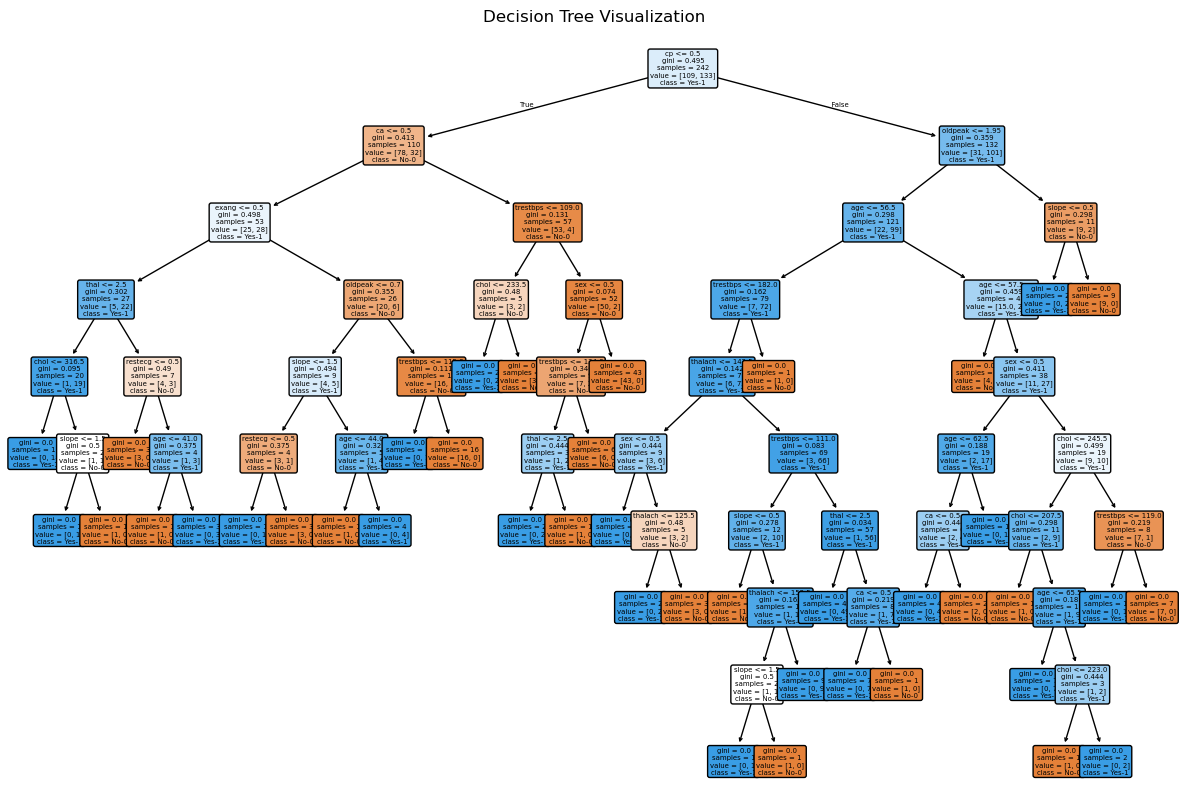

In [137]:
plt.figure(figsize=(15, 10)) # Adjust figure size for better readability
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=['No-0','Yes-1'],
          filled=True, # Color nodes based on class
          rounded=True, # Round node corners
          fontsize=5) # Adjust font size

plt.title("Decision Tree Visualization")
plt.show() # Display the plot

# Step 5.5: Ensemble ML Model
- `Bagging Technique`: Bags of Multiple ML Model, and each model give it's prediction/classification, final outcome based on majority
- `Boosting Technique`: Next model learn from previous model and boost it minimize error to improve score

In [138]:
# Random Forest regression problem: Avg of Final value>> 2.2 + 2.4 + 2.5>> 2.36
# Random Forest Classification>> Binary/Multiclass classification >> Majority Voting

# step 5.5.2-Importing Forest Model

In [139]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 200) # Parameter change Default Tree 100 to 200

model_rf.fit(X_train,y_train)  # Learning

RandomForestClassifier(n_estimators=200)

In [140]:
y_pred = model_rf.predict(X_test)

In [141]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.8688524590163934
Precision Score:  0.8529411764705882
Recall Score:  0.90625
F1 Score:  0.8787878787878788


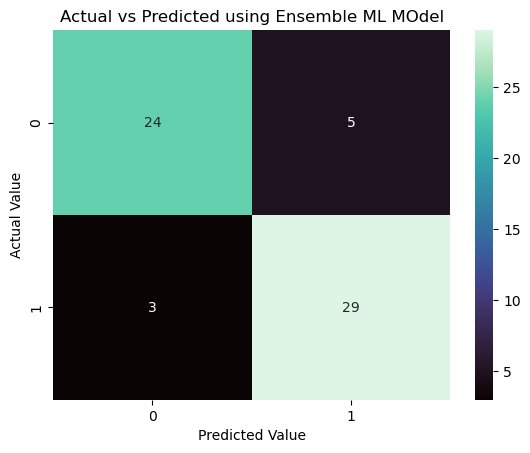

In [142]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using Ensemble ML MOdel')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [143]:
# Adaboost: Adaptive Boosting
# Gradientboost: GBM
# LBM: Gradientboost: LGBM
# XGboost: Extreme Gradient Boosting:
# Catboost: Categorical: textual data:

In [158]:
from IPython.display import Image, display

# Your image URL
url = 'https://ars.els-cdn.com/content/image/1-s2.0-S1568494623000844-gr6.jpg'

# Display the image
display(Image(url=url,width=400))

In [144]:
pip install xgboost

   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
    --------------------------------------- 2.9/149.9 MB 31.4 MB/s eta 0:00:05
   -- ------------------------------------- 8.7/149.9 MB 27.5 MB/s eta 0:00:06
   ---- ----------------------------------- 16.5/149.9 MB 29.9 MB/s eta 0:00:05
   ----- ---------------------------------- 22.0/149.9 MB 29.3 MB/s eta 0:00:05
   ------- -------------------------------- 27.8/149.9 MB 29.2 MB/s eta 0:00:05
   -------- ------------------------------- 32.2/149.9 MB 27.8 MB/s eta 0:00:05
   --------- ------------------------------ 36.7/149.9 MB 26.7 MB/s eta 0:00:05
   ---------- ----------------------------- 40.9/149.9 MB 26.0 MB/s eta 0:00:05
   ------------ --------------------------- 45.4/149.9 MB 25.4 MB/s eta 0:00:05
   ------------- -------------------------- 50.1/149.9 MB 25.1 MB/s eta 0:00:04
   -------------- ------------------------- 54.5/149.9 MB 24.8 MB/s eta 0:00:04
   --------------- ------------------------ 58.2/14

In [149]:
import xgboost
print("Done")

Done


In [159]:
from xgboost import XGBClassifier

In [160]:
model_xgb=XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [161]:
y_pred = model_xgb.predict(X_test)

In [162]:
xgb_score = accuracy_score(y_test,y_pred)

In [163]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.819672131147541
Precision Score:  0.8620689655172413
Recall Score:  0.78125
F1 Score:  0.819672131147541


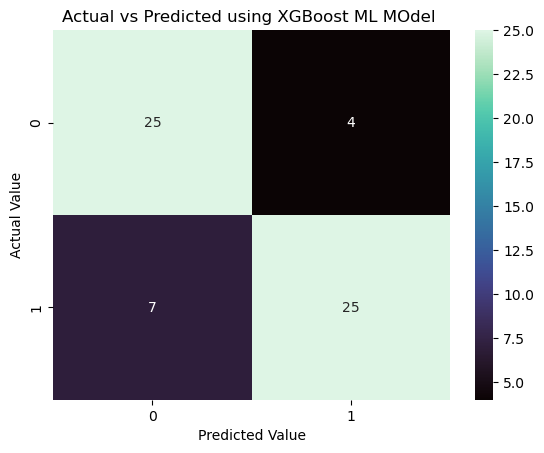

In [164]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using XGBoost ML MOdel ')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

# Import K.N.N

In [168]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=14)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [169]:
y_pred=model_knn.predict(X_test)

In [170]:
knn_score = accuracy_score(y_test,y_pred)
knn_score

0.7377049180327869

In [171]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



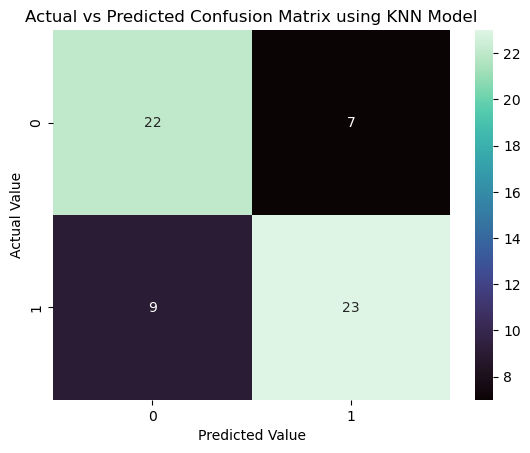

In [172]:
# Step 5.3.4
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted Confusion Matrix using KNN Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

# Artificial Neural Network

In [173]:
# ML works only on Limited data
# If Input Changes ML Model fail(8 Features col: 8)

In [174]:
from IPython.display import Image, display

# Your image URL
url = 'https://editor.analyticsvidhya.com/uploads/94912bosem.png'

# Display the image
display(Image(url=url,width=400))

In [175]:
from IPython.display import Image, display

# Your image URL
url = 'https://media.licdn.com/dms/image/v2/D4D12AQH2F3GJ9wen_Q/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1688885174323?e=2147483647&v=beta&t=dY_S6xeNsRCIvpIrjrPFzq8qgHPgmP4e_HLaA15ufPM'

# Display the image
display(Image(url=url,width=400))

# ANN Model Creation

In [177]:
pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
    --------------------------------------- 6.0/332.0 MB 45.7 MB/s eta 0:00:08
   - -------------------------------------- 15.2/332.0 MB 50.2 MB/s eta 0:00:07
   --- ------------------------------------ 27.3/332.0 MB 49.0 MB/s eta 0:00:07
   ---- ----------------------------------- 39.3/332.0 MB 51.5 MB/s eta 0:00:06
   ------ --------------------------------- 50.9/332.0 MB 52.3 MB/s eta 0:00:06
   ------- -------------------------------- 62.1/332.0 MB 52.4 MB/s eta 0:00:06
   -------- ------------------------------- 72.9/332.0 MB 52.5 MB/s eta 0:00:05
   --------- ------------------------------ 81.0/332.0 MB 50.7 MB/s eta 0:00:05
   ---------- ----------------------------- 86.8/332.0 MB 48.1 MB/s eta 0:00:06
   ----------- ---------------------------- 92.5/332.0 MB 46.0 MB/s eta 0:00:06
   ----------- ---------------------------- 98.6/332.0 MB 44.3 MB/s eta 0:00:06
   ------------ -------------------------- 104.6/3

In [176]:
pip install keras

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 14.4 MB/s eta 0:00:00

   -------- ------------------------------- 1/5 [optree]
   ------------------------ --------------- 3/5 [absl-py]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- ------- 4/5 [keras]
   -------

In [178]:
from keras.models import Sequential
from keras.layers import Dense

In [179]:
model = Sequential()  # Step 1 Sequential model creation
model.add(Dense(11,activation='relu',input_dim=13)) # Dense Layer
model.add(Dense(1,activation='sigmoid')) # Output will be 1 Neuron for Binary

model.compile(loss='binary_crossentropy',  # loss to calculate model loss
              optimizer='adam', #optimizer to optimize model learning
              metrics=['accuracy'])  #  metrics return accuracy score

print('Done')

Done


In [180]:
model.fit(X_train,y_train,epochs=300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4504 - loss: 44.0033
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4504 - loss: 32.6029 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4504 - loss: 20.7081 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4132 - loss: 9.7458 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4256 - loss: 4.0919 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5124 - loss: 5.1117 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4669 - loss: 3.8890 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3802 - loss: 3.5241 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3760 - loss: 3.3182 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4421 - loss: 3.1504 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4587 - loss: 3.0359 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4339 -

In [181]:
# 5.8.4 pred y_value

y_pred = model.predict(X_test)
y_pred  = [round(i[0]) for i in  y_pred]
print(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]


In [182]:
ann_score = accuracy_score(y_test,y_pred)
ann_score

0.8852459016393442

In [ ]:
# step 6- All Model Comparison